# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Regression
### VIDEO: Polynomial regression
#### TEACHER: Mike X Cohen, sincxpress.com

In [2]:
import numpy as np
import matplotlib.pyplot as plt

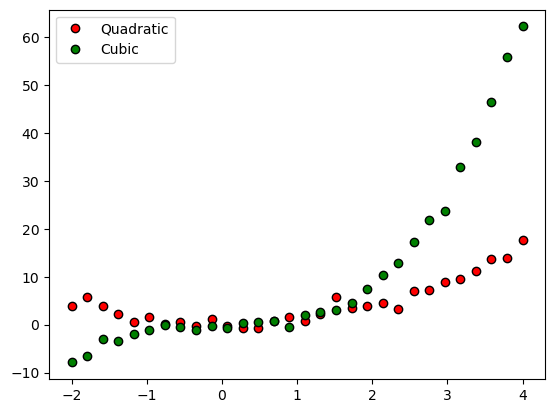

In [3]:
## generate the data - two datasets y1 and y2

n  = 30
x  = np.linspace(-2,4,n) # create 30 data points (independent/fixed vars) within range of -2 to 4 
y1 = x**2 + np.random.randn(n) # quadratic relationship data with random number noise
y2 = x**3 + np.random.randn(n) # cubed relationship data with a little noise added


# plot the data
plt.plot(x,y1,'ko',markerfacecolor='r')
plt.plot(x,y2,'ko',markerfacecolor='g')
plt.legend(('Quadratic','Cubic'))
plt.show()

[ 1.06818401 -0.19530458  0.12436408]


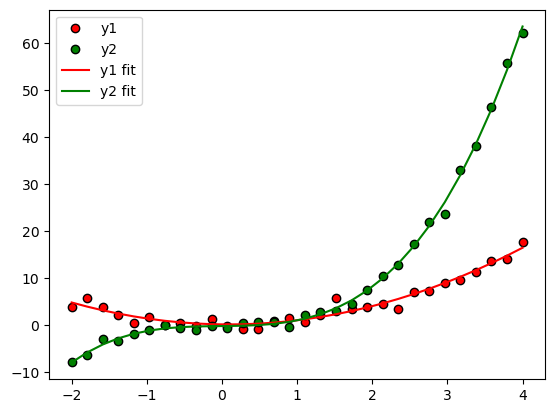

In [4]:
## now for a polynomial fit

# for y1
# polyfit: first arg is IV, then dependent variable(y dataset), then specify the order of polynomial
  # we know the order is 2 since we made the data, but you can use the BIC to calculate it (see further below cells)
pterms = np.polyfit(x,y1,2) 
print(pterms) # we get 3 nums: x^2 term, x^1 term, x^0 (intercept term) - NOTE THE ORDER!!!

# We now use the polyfit terms in the polyval function to evaluate the polynomial
   # input the coefficients and the independent variable 
# this gives us the predicted data
yHat1 = np.polyval(pterms,x) # evaluate a polynomial regression


# for y2
pterms = np.polyfit(x,y2,3) # third order polynomial (again we know since we created the x**3 data)
yHat2 = np.polyval(pterms,x)

# and all the plotting 
plt.plot(x,y1,'ko',markerfacecolor='r',label='y1')
plt.plot(x,y2,'ko',markerfacecolor='g',label='y2')

plt.plot(x,yHat1,'r',label='y1 fit') # red line squared data
plt.plot(x,yHat2,'g',label='y2 fit') # green line cubed data
plt.legend()
plt.show()

In [5]:
# compute R2 for models of different polynomial orders

# We need to find out what the right order is for the polynomial.
# We know because we created the data, but in practice you don't know and need to use BIC to compute the correct order.

# compute R2 for several polynomial orders
# loop over model orders (6 here in this case) and compute the BIC to find the best fit of these
orders = np.arange(1,6) # [1, 2, 3, 4, 5]

# output matrices
r2 = np.zeros((2,len(orders))) # 2 rows of zeroes x 5 columns
sse = np.zeros((2,len(orders)))

# the loop over model orders
for oi in range(len(orders)):
    
    # fit the model with oi terms - compute the y hat using the polyfit and polyval functions
    pterms = np.polyfit(x,y1,orders[oi]) # soft code the order paramter in here
    yHat = np.polyval(pterms,x)
    
    # compute R2
    ss_eta = sum((y1-yHat)**2)  # numerator
    ss_tot = sum((y1-np.mean(y1))**2)  # denominator
    r2[0,oi] = 1 - ss_eta/ss_tot  # R^2
    sse[0,oi] = ss_eta  # store just the SSe for model comparison later
    # ^ retain the sum of squares error for the residual - we need this for the Bayes Information Criteria
    
    
    ### repeat for y2 - same as above just applied for the second dataset
    pterms = np.polyfit(x,y2,orders[oi])
    yHat   = np.polyval(pterms,x)
    ss_eta = sum((y2-yHat)**2)
    ss_tot = np.var(y2)*(n-1)
    r2[1,oi] = 1 - ss_eta/ss_tot
    sse[1,oi] = ss_eta


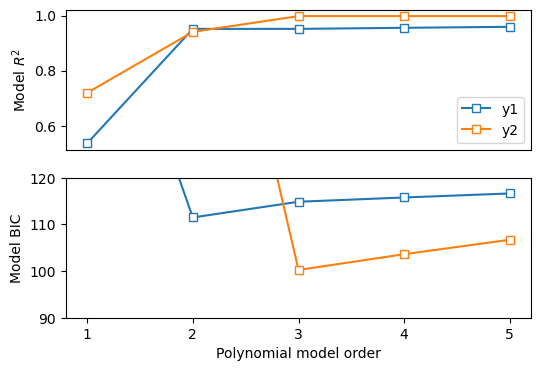

In [9]:
fig,ax = plt.subplots(2,1,figsize=(6,4))

# plot the R2 results for the two models
# note how it keeps getting higher and higher as we increase the order (add more parameters to model and the fit just keeps getting better)
# This is generally what you see with regression models (i.e. over-fitting)
# for this reason we cannot trust the R squared for telling us the best fit/order - we need to use BIC for this
ax[0].plot(orders,r2[0,:],'s-',markerfacecolor='w')
ax[0].plot(orders,r2[1,:],'s-',markerfacecolor='w')
ax[0].set_ylabel('Model $R^2$')
ax[0].set_xticks([])
ax[0].legend(('y1','y2'))



# compute the Bayes Information Criterion
# n is num of datapoints multiplied by the log of the sum of sqaures for the residual added with the orders multiplied the log of n (data points)
bic = n*np.log(sse) + orders*np.log(n) 
# the BIC increases when the number of params/order increases (BIC gets larger and larger with higher orders)
  # the sum of square residuals balances this out which is the fit to the data.
  # so we choose the smallest BIC - to find a good fit without over-fitting

# Bottom plot
# Plotting the BICs for datasets. Note how on the left the BICs are larger when the order is smaller.
# Then it goes down with the optimal num of orders and after continues to get larger slowly
# it will look flat, but you need to zoom in to really see the lowest point (the correct order/num of parameters)
ax[1].plot(orders,bic[0,:],'s-',markerfacecolor='w')
ax[1].plot(orders,bic[1,:],'s-',markerfacecolor='w')
ax[1].set_xlabel('Polynomial model order')
ax[1].set_xticks(range(1,6))
ax[1].set_ylabel('Model BIC')

# optional zoom - comment this out to see the effect described above of the BIC line looking flat.
ax[1].set_ylim([90,120])

plt.show()